In [585]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
scale = StandardScaler()

In [586]:
data = pd.read_csv('./data.csv')
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [587]:
data.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True)
data.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [588]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


#### Labeling categorical data

In [589]:
data.Item_Fat_Content.unique()
data.Item_Fat_Content.replace({"Low Fat":0,"low fat":0,"LF":0,"reg":1,"Regular":1},inplace=True)

In [590]:
data.Outlet_Size.unique()
data.Outlet_Size.replace({"Medium":1,"High":2,"Small":0},inplace=True)

In [591]:
data.Outlet_Location_Type.unique()
data.Outlet_Location_Type.replace({"Tier 1":0,"Tier 2":1,"Tier 3":2},inplace=True)

In [592]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data.Outlet_Type.unique()
data.Outlet_Type = le.fit_transform(data.Outlet_Type)
data.Outlet_Type.unique()

array([1, 2, 0, 3])

In [593]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   float64
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int32(1), int64(3), object(1)
memory usage: 632.7+ KB


#### Dropping null values

In [594]:
data.dropna(inplace=True)

In [595]:
data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Check correlation heatmap for feature selection

<Axes: >

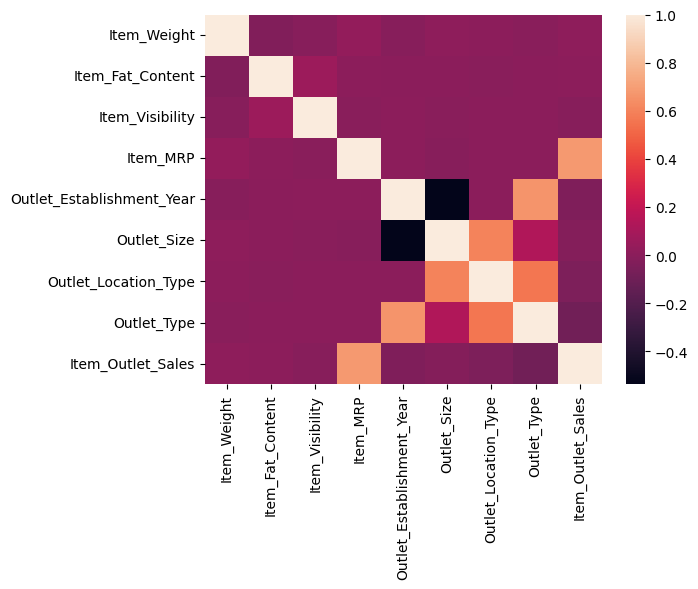

In [596]:
sns.heatmap(data.drop(columns=['Item_Type']).corr())

In [597]:
data.drop(columns=['Item_Type']).corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033026,-0.010229,0.033330,-0.010596,0.011948,0.004574,-0.002708,0.010972
Item_Fat_Content,-0.033026,1.000000,0.059357,0.006966,0.001849,-0.000906,-0.005028,0.001697,0.008847
Item_Visibility,-0.010229,0.059357,1.000000,-0.007292,0.009324,-0.006419,-0.001508,0.003516,-0.009644
Item_MRP,0.033330,0.006966,-0.007292,1.000000,0.004105,-0.008723,0.002683,-0.000302,0.679594
Outlet_Establishment_Year,-0.010596,0.001849,0.009324,0.004105,1.000000,-0.536393,-0.001432,0.662985,-0.040869
Outlet_Size,0.011948,-0.000906,-0.006419,-0.008723,-0.536393,1.000000,0.597936,0.133092,-0.025965
Outlet_Location_Type,0.004574,-0.005028,-0.001508,0.002683,-0.001432,0.597936,1.000000,0.558266,-0.049423
Outlet_Type,-0.002708,0.001697,0.003516,-0.000302,0.662985,0.133092,0.558266,1.000000,-0.092191
Item_Outlet_Sales,0.010972,0.008847,-0.009644,0.679594,-0.040869,-0.025965,-0.049423,-0.092191,1.000000


### As we can see only Item_MRP is highly correlated with Item_Outlet_Sales

## Scaling data

In [598]:
x = scale.fit_transform(data[['Item_MRP']])
y = data['Item_Outlet_Sales']

## Model creation

In [599]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=1000, test_size=0.3)

In [600]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

### This is the best possible model with the given features

R2 score is: 0.4756034871684426
MSE is: 1199492.1974645427


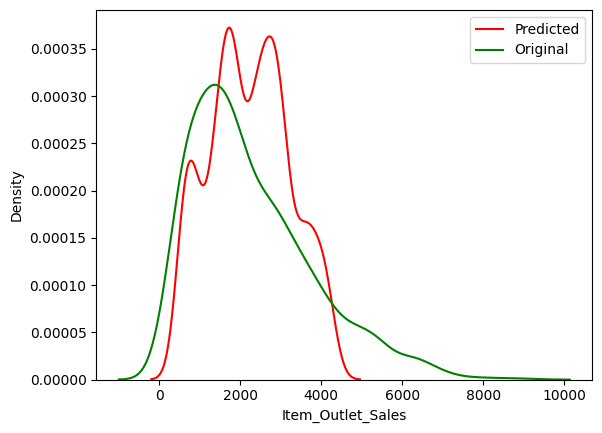

In [601]:
ax = sns.kdeplot(ypred,color='red',label='Predicted')
sns.kdeplot(ytest,color='green',label='Original',ax=ax)
plt.legend()

print("R2 score is: {}".format(r2_score(ytest,ypred)))
print("MSE is: {}".format(mean_squared_error(ytest,ypred)))